# Trajectories of a Freely Released Payload Near Earth: 

## Problem 3: Payload Trajectories


### Task: A Comprehensive Breakdown

1.  **Trajectory Analysis:** Analyze the possible types of trajectories a payload can follow when released near Earth (elliptical, parabolic, and hyperbolic), and explain the conditions that lead to each type.
2.  **Numerical Computation:** Perform a numerical analysis to compute the precise path of the payload. This includes defining the equations of motion, choosing a numerical integration method, and specifying the initial conditions.
3.  **Orbital Scenarios:** Discuss how these trajectories relate to real-world orbital scenarios such as orbital insertion (achieving a stable orbit), reentry (returning to Earth's atmosphere), and escape (leaving Earth's gravitational influence).
4.  **Computational Simulation:** Develop a computational tool (using Python) to simulate and visualize the motion of the payload under Earth's gravity. The tool should account for initial velocities, directions, and allow for variations in these parameters.

### Possible Trajectories:

The type of trajectory a payload follows after release is primarily determined by its **total mechanical energy**, which is the sum of its kinetic energy and potential energy.

-   **Elliptical Trajectory:**
    -   Occurs when the payload's total mechanical energy is **negative**.
    -   The payload's velocity is **less than** the escape velocity at its given position.
    -   In this case, the gravitational force is strong enough to keep the payload bound to Earth, causing it to move in a closed, elliptical orbit.
    -   This is the type of trajectory desired for placing satellites in orbit.

-   **Parabolic Trajectory:**
    -   Occurs when the payload's total mechanical energy is **zero**.
    -   The payload's velocity is **exactly equal to** the escape velocity at its given position.
    -   The payload has just enough energy to overcome Earth's gravity and move to infinity, but its velocity will approach zero as it does so.
    -   This is a transitional trajectory between elliptical and hyperbolic.

-   **Hyperbolic Trajectory:**
    -   Occurs when the payload's total mechanical energy is **positive**.
    -   The payload's velocity is **greater than** the escape velocity at its given position.
    -   The payload has more than enough energy to escape Earth's gravity and will continue to move away from Earth with a non-zero velocity even at very large distances.
    -   This type of trajectory is used for missions that need to leave Earth's vicinity, such as interplanetary probes.

### Numerical Analysis: 

To accurately predict the payload's path, we need to solve the equations of motion numerically.

#### Equations of Motion

The motion of the payload is governed by Newton's Law of Universal Gravitation:

$$
\mathbf{F} = -\frac{GMm}{r^2} \mathbf{\hat{r}}
$$

where:

-   $\mathbf{F}$ is the gravitational force acting on the payload.
-   $G$ is the gravitational constant ($6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$).
-   $M$ is the mass of Earth ($5.972 \times 10^{24} \, \text{kg}$).
-   $m$ is the mass of the payload.
-   $r$ is the distance between the payload and the center of Earth.
-   $\mathbf{\hat{r}}$ is the unit vector pointing from Earth to the payload.

Using Newton's Second Law ($\mathbf{F} = m\mathbf{a}$), we can derive the equation of motion:

$$
m\mathbf{a} = -\frac{GMm}{r^2} \mathbf{\hat{r}}
$$

$$
\mathbf{a} = -\frac{GM}{r^2} \mathbf{\hat{r}}
$$

Since acceleration is the second derivative of position with respect to time ($\mathbf{a} = \frac{d^2\mathbf{r}}{dt^2}$), we can write this as:

$$
\frac{d^2\mathbf{r}}{dt^2} = -\frac{GM}{r^2} \mathbf{\hat{r}}
$$

Or, in vector form:

$$
\frac{d^2\mathbf{r}}{dt^2} = -\frac{GM\mathbf{r}}{r^3}
$$

#### Numerical Integration Method

To solve this second-order differential equation, we'll use a numerical integration method. A common and relatively simple method is the **Euler method**. While not the most accurate, it serves as a good starting point for demonstrating the concept. More accurate methods like the **Runge-Kutta methods** (e.g., RK4) can be used for higher precision.

The Euler method approximates the position and velocity of the payload at discrete time steps.

Let:

-   $\mathbf{r}_i$ be the position vector at time step $i$.
-   $\mathbf{v}_i$ be the velocity vector at time step $i$.
-   $\mathbf{a}_i$ be the acceleration vector at time step $i$.
-   $\Delta t$ be the time step.

Then, the Euler method updates the velocity and position as follows:

$$
\mathbf{v}_{i+1} = \mathbf{v}_i + \mathbf{a}_i \Delta t
$$

$$
\mathbf{r}_{i+1} = \mathbf{r}_i + \mathbf{v}_{i+1} \Delta t
$$

The acceleration $\mathbf{a}_i$ is calculated using the equation of motion:

$$
\mathbf{a}_i = -\frac{GM\mathbf{r}_i}{r_i^3}
$$

#### Initial Conditions

To perform the numerical integration, we need to specify the initial conditions:

-   **Initial Position Vector ($\mathbf{r}_0$):** This defines the starting point of the payload (e.g., altitude and location relative to Earth's center).
-   **Initial Velocity Vector ($\mathbf{v}_0$):** This defines the initial velocity of the payload (e.g., speed and direction).

### Orbital Insertion, Reentry, and Escape: Connecting Trajectories to Space Missions

The trajectories of a released payload have direct implications for various space mission scenarios:

-   **Orbital Insertion:**
    -   To insert a payload into a stable orbit, the release conditions (position and velocity) must be carefully chosen to achieve an **elliptical trajectory**.
    -   The payload's velocity should be less than the escape velocity, and the trajectory's parameters (semi-major axis, eccentricity) will determine the orbit's shape and altitude.
    -   Rocket burns are often used to fine-tune the orbit after initial release.

-   **Reentry:**
    -   For a payload or spacecraft to reenter Earth's atmosphere, its trajectory must be directed towards Earth.
    -   Reentry trajectories are typically **elliptical**, with the perigee (closest point to Earth) of the ellipse intersecting the atmosphere.
    -   The angle of entry and the shape of the trajectory are crucial for managing the heat and forces experienced during reentry.

-   **Escape:**
    -   To send a payload on an escape trajectory, its release velocity must be **greater than or equal to** the escape velocity at the release point.
    -   A **parabolic trajectory** represents the minimum energy escape, while a **hyperbolic trajectory** indicates that the payload has excess energy and will continue moving away from Earth with a significant velocity.
    -   Escape trajectories are used for interplanetary and interstellar missions.

### Computational Tool: Simulating Payload Motion with Python

The following Python script implements the numerical simulation of the payload's trajectory using the Euler method. It visualizes the trajectory and includes Earth for reference.


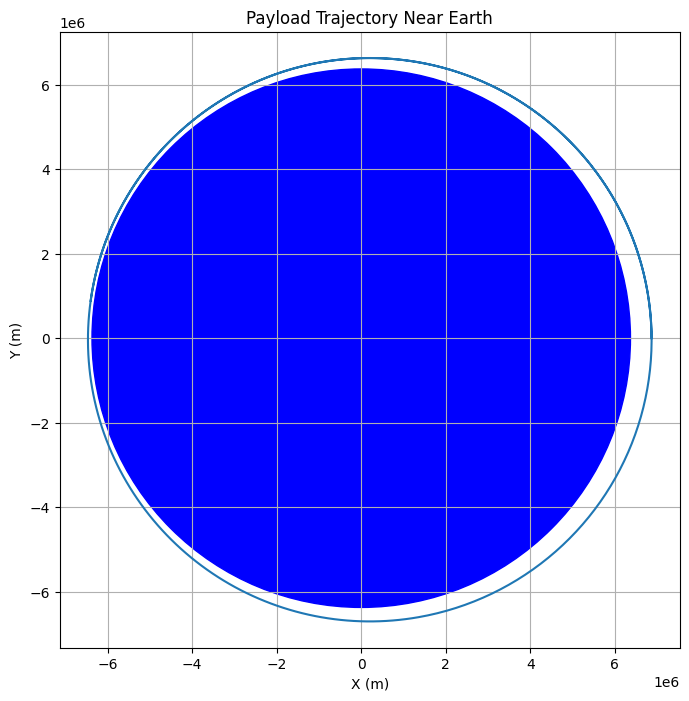

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of Earth (kg)
R_earth = 6.371e6 # Radius of Earth (m)

# Initial conditions
r0 = np.array([R_earth + 500e3, 0.0])  # Initial position (500 km altitude)
v0 = np.array([0.0, 7.5e3])           # Initial velocity

# Time parameters
dt = 10.0           # Time step (s)
t_total = 8000.0    # Total simulation time (s)
t = 0.0

# Lists to store trajectory
trajectory_r = [r0]
trajectory_v = [v0]

# Simulation loop
while t < t_total:
    r = trajectory_r[-1]
    v = trajectory_v[-1]
    r_mag = np.linalg.norm(r)

    a = -G * M * r / (r_mag**3)  # Acceleration due to gravity
    v_new = v + a * dt
    r_new = r + v_new * dt

    trajectory_r.append(r_new)
    trajectory_v.append(v_new)
    t += dt

# Convert to numpy arrays for plotting
trajectory_r = np.array(trajectory_r)

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(trajectory_r[:, 0], trajectory_r[:, 1])
plt.gca().add_patch(plt.Circle((0, 0), R_earth, color='blue'))
plt.axis('equal')
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Payload Trajectory Near Earth")
plt.grid(True)
plt.show()